In [ ]:
column_to_predict = 'transcriptConsumer_en'

In [ ]:
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/My Drive/nlp-projects/inputs/en/translated_filtered_1.8.23_19.9.23.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv(drive_path)
df.shape

(238, 20)

<Axes: ylabel='count'>

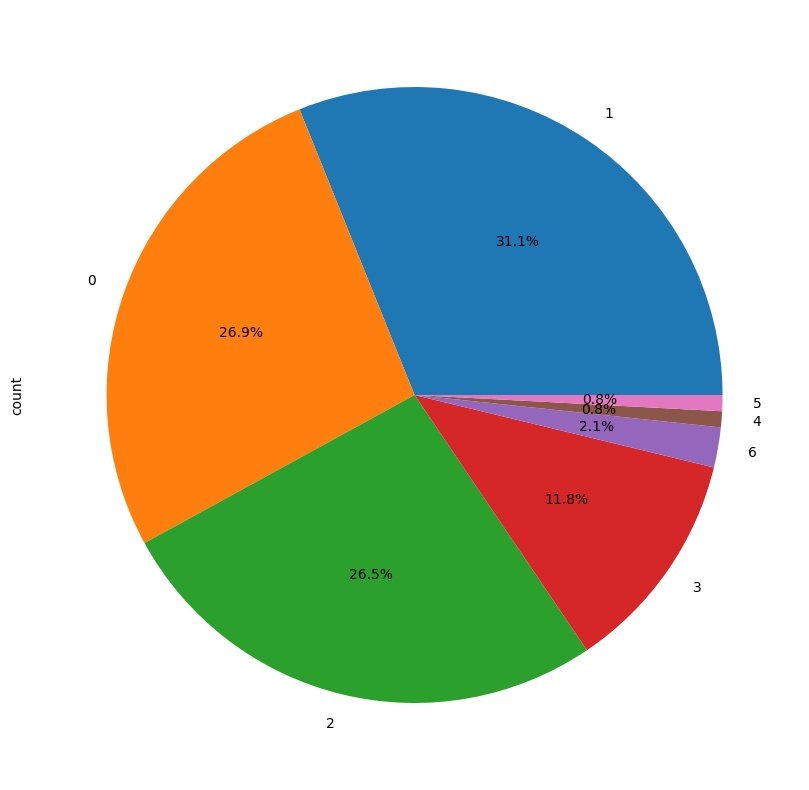

In [ ]:
df['classification'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

In [ ]:
df.columns

Index(['conversationId', 'firstConversation', 'transcriptAll',
       'transcriptConsumer', 'classification', 'classification 2', 'despair',
       'loneliness', 'emotional overflow', 'self blame', 'anxiety',
       'distrust / confusion', 'new assault / new exposure',
       'level of suicide/ level of risk', 'obligation to report occording law',
       'support for support circuls', 'category', 'labels',
       'transcriptConsumer_count', 'transcriptConsumer_en'],
      dtype='object')

# level 1: vector without classification, classification 2

In [ ]:
columns_to_vectorized = ['despair',
       'loneliness', 'emotional overflow', 'self blame', 'anxiety',
       'distrust / confusion', 'new assault / new exposure',
       'level of suicide/ level of risk', 'obligation to report occording law',
       'support for support circuls']

In [ ]:
"""

# Convert int values to binary vector
def int_to_binary_vector(value, bits):
    return [int(bit) for bit in format(value, f'0{bits}b')]
"""

"\n\n# Convert int values to binary vector\ndef int_to_binary_vector(value, bits):\n    return [int(bit) for bit in format(value, f'0{bits}b')]\n"

In [ ]:
"""
for column in columns_to_vectorized:
  max_column_value = int(df[column].max())
  bits = max_column_value.bit_length()
  print(f'col: {column}: bits: {bits}')
  df[f'{column}_vec'] = df[column].apply(lambda x: int_to_binary_vector(x, bits))
  """

"\nfor column in columns_to_vectorized:\n  max_column_value = int(df[column].max())\n  bits = max_column_value.bit_length()\n  print(f'col: {column}: bits: {bits}')\n  df[f'{column}_vec'] = df[column].apply(lambda x: int_to_binary_vector(x, bits))\n  "

In [ ]:
"""
def concatenate_binary_vectors():
  concatenated_vector = []
  for column in columns_to_vectorized:
    concatenated_vector.extend(df[f'{column}_vec'].values)
  return concatenated_vector
"""

"\ndef concatenate_binary_vectors():\n  concatenated_vector = []\n  for column in columns_to_vectorized:\n    concatenated_vector.extend(df[f'{column}_vec'].values)\n  return concatenated_vector\n"

In [ ]:
"""
def concatenate_binary_vectors(row, columns):
    concatenated_vector = []
    for column in columns:
        concatenated_vector.extend(row[f'{column}_vec'])
    return concatenated_vector

# Apply the concatenation function to each row
df['feelings_vector'] = df.apply(lambda row: concatenate_binary_vectors(row, columns_to_vectorized), axis=1)

print(df['feelings_vector'])
"""

"\ndef concatenate_binary_vectors(row, columns):\n    concatenated_vector = []\n    for column in columns:\n        concatenated_vector.extend(row[f'{column}_vec'])\n    return concatenated_vector\n\n# Apply the concatenation function to each row\ndf['feelings_vector'] = df.apply(lambda row: concatenate_binary_vectors(row, columns_to_vectorized), axis=1)\n\nprint(df['feelings_vector'])\n"

# Encode Non-binary Columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encode the text_column
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df[columns_to_vectorized])

NUM_LABLES = len(encoded_columns)
NUM_LABLES

# Convert the encoded columns to a DataFrame and concatenate with the original DataFrame
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_vectorized))
df = pd.concat([df, encoded_df], axis=1).drop(columns_to_vectorized, axis=1)

# Display the updated DataFrame
print(df)

                           conversationId  firstConversation  \
0    9942e3a8-7493-4994-b671-5b8f1d1260ff                  0   
1    11e41ce3-bd95-48fc-84ee-a608b3dba8f5                  0   
2    55d31bbc-440f-4b85-9d5a-63f346d0a0c0                  1   
3    28ac542e-d7bd-4506-97f9-fa037fe3e721                  1   
4    cc5bebbf-32bf-49b0-8abf-35ad9e69eccd                  0   
..                                    ...                ...   
233  cad35b3f-b11d-4c03-9a5e-f93307f30ed6                  1   
234  f6145361-ad85-4283-bbce-9be720614395                  0   
235  9eec7271-aec7-4871-a50a-b1c7afd7c97a                  0   
236  7289bf03-07d7-46ed-800a-fccd74d50b7d                  0   
237  3092049a-ea24-43f2-ae8a-5ec024ef8027                  1   

                                         transcriptAll  \
0    consumer: כואב לי בחזה\nconsumer: כואב לי\ncon...   
1    consumer: כן\nconsumer: תשלחי לי הודעה כשתתפני...   
2    consumer: שלום, יש אפשרות לקבל המלצה/רשימה של ...   

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
count_encoded_lables = len(encoded_df.columns)
count_encoded_lables

22

In [ ]:
df.columns

Index(['conversationId', 'firstConversation', 'transcriptAll',
       'transcriptConsumer', 'classification', 'classification 2', 'category',
       'labels', 'transcriptConsumer_count', 'transcriptConsumer_en',
       'despair_0', 'despair_1', 'loneliness_0', 'loneliness_1',
       'emotional overflow_0', 'emotional overflow_1', 'self blame_0',
       'self blame_1', 'anxiety_0', 'anxiety_1', 'distrust / confusion_0',
       'distrust / confusion_1', 'new assault / new exposure_0',
       'new assault / new exposure_1', 'level of suicide/ level of risk_0',
       'level of suicide/ level of risk_1',
       'level of suicide/ level of risk_2',
       'level of suicide/ level of risk_3',
       'obligation to report occording law_0',
       'obligation to report occording law_1', 'support for support circuls_0',
       'support for support circuls_1'],
      dtype='object')

In [ ]:
vectorized_path = '/content/drive/My Drive/nlp-projects/inputs/en/1.8.23_19.9.23_vectorized.csv'
#vectorized_path = '/content/vectorized.csv'


In [ ]:
df.to_csv(vectorized_path, index=False)

In [ ]:
df = pd.read_csv(vectorized_path, index=False)

In [ ]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
!pip install accelerate -U
!pip install torch transformers -U
#!pip install transformers[torch]
!pip install datasets

# Model Preparation

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch

class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        labels = self.labels[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(labels, dtype=torch.float)
        }

In [ ]:
# Create a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.float)  # Ensure labels are float for BCEWithLogitsLoss
        }


In [ ]:
count_encoded_lables

22

In [ ]:
#model_name = "distilbert-base-uncased"
model_name = "bert-base-multilingual-cased"

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback, IntervalStrategy
from transformers import BertForSequenceClassification, BertTokenizer

"""
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=count_encoded_lables)
"""
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=count_encoded_lables)

RuntimeError: Failed to import transformers.trainer because of the following error (look up to see its traceback):
module 'pyarrow.lib' has no attribute 'ListViewType'

In [ ]:
df[column_to_predict] = df[column_to_predict].astype(str)
texts = df[column_to_predict].values

labels = df[encoded_df.columns].values.tolist()


In [ ]:
# Split data into train and test sets
#train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

"""
SIZE= df.shape[0]

train_texts= list(texts[:SIZE//2])
val_texts=   list(texts[SIZE//2:(3*SIZE)//4 ])
test_texts=  list(texts[(3*SIZE)//4:])

train_labels= list(labels[:SIZE//2])
val_labels=   list(labels[SIZE//2:(3*SIZE)//4])
test_labels=  list(labels[(3*SIZE)//4:])



# Create datasets
train_dataset = SentimentDataset(train_texts, train_labels, tokenizer, max_length=128)
val_dataset = SentimentDataset(val_texts, val_labels, tokenizer, max_length=128)
test_dataset = SentimentDataset(test_labels, val_labels, tokenizer, max_length=128)
"""

In [ ]:
"""
# Create dataset
dataset = CustomDataset(texts=texts, labels=labels, tokenizer=tokenizer, max_len=128)

train_size = 0.8
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [int(train_size * len(dataset)), len(dataset) - int(train_size * len(dataset))])
"""

from transformers import TextDataset, DataCollatorWithPadding
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2)
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)

train_dataset = TextDataset(train_encodings, train_labels)
val_dataset = TextDataset(val_encodings, val_labels)


In [ ]:
"""
from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import StratifiedShuffleSplit
from torch.utils.data import DataLoader, Subset

# Create stratified split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, val_idx = list(splitter.split(texts, labels))[0]

train_dataset = Subset(dataset, train_idx)
val_dataset = Subset(dataset, val_idx)
"""

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, hamming_loss, f1_score

# Define compute_metrics function for multi-label classification
def compute_metrics(p):
    preds = (p.predictions > 0).astype(int)  # Convert logits to binary predictions
    labels = p.label_ids
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='samples')
    accuracy = accuracy_score(labels, preds)
    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'hamming_loss': hamming_loss(labels, preds)  # Add hamming loss
    }

In [ ]:
"""
from datasets import load_metric

# Load metrics
accuracy_metric = load_metric("accuracy")
precision_metric = load_metric("precision")
recall_metric = load_metric("recall")
f1_metric = load_metric("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = (torch.sigmoid(torch.tensor(logits)) > 0.5).int().numpy()
    labels = labels.astype(int)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    precision = precision_metric.compute(predictions=predictions, references=labels, average='macro')
    recall = recall_metric.compute(predictions=predictions, references=labels, average='macro')
    f1 = f1_metric.compute(predictions=predictions, references=labels, average='macro')

    return {
        'accuracy': accuracy['accuracy'],
        'precision': precision['precision'],
        'recall': recall['recall'],
        'f1': f1['f1']
    }
    """

In [ ]:
from transformers import Trainer, TrainingArguments
from transformers import EarlyStoppingCallback, IntervalStrategy


In [ ]:
# Define custom loss function
def custom_loss_function(outputs, labels):
    loss_fct = torch.nn.BCEWithLogitsLoss()
    return loss_fct(outputs.logits, labels)

# Custom Trainer class to use custom loss function and log loss values
class CustomTrainer(Trainer):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.train_loss = []
        self.eval_loss = []

    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        loss = custom_loss_function(outputs, labels)
        return (loss, outputs) if return_outputs else loss

    def log(self, logs: dict):
        super().log(logs)
        if 'loss' in logs:
            self.train_loss.append(logs['loss'])
        if 'eval_loss' in logs:
            self.eval_loss.append(logs['eval_loss'])

In [ ]:
# Define training arguments with learning rate scheduling
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,  # Increase epochs
    per_device_train_batch_size=16,  # Adjust batch size
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy=IntervalStrategy.STEPS,
    eval_steps=50,
    save_steps=50,  # Save model at the same interval as evaluation
    #save_strategy="epoch",
    learning_rate=2e-5,  # Lower learning rate
    metric_for_best_model = 'eval_f1',
    report_to="tensorboard",
    load_best_model_at_end=True  # Load the best model at the end of training
)

In [ ]:
from transformers import get_linear_schedule_with_warmup
# Initialize the optimizer and scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
train_steps = len(train_dataset) * training_args.num_train_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=train_steps)

# Initialize the Trainer with EarlyStoppingCallback
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    optimizers=(optimizer, scheduler),
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3, early_stopping_threshold=0.0)]
)

# Train the model
trainer.train()

In [ ]:
# Evaluate the best model on the validation dataset
evaluation_results = trainer.evaluate()

accuracy = format(evaluation_results['eval_accuracy'],".2f")
print(accuracy)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Evaluate the model
eval_results = trainer.evaluate()

eval_df = pd.DataFrame([eval_results])
print("Evaluation Results:")
print(eval_df)

# Save model for inference

In [ ]:
"""
def create_zip_and_download(zip_file_path, folder_to_zip):
  # Create a zip file
  !zip -r {zip_file_path} {folder_to_zip}

  # Download the zip file
  files.download(zip_file_path)
  """

In [ ]:
#model_path = "text-to-vector-model-consumer-en"
model_path = '/content/drive/My Drive/nlp-projects/models/text-to-vector/{model_name}'


In [ ]:
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

# load the model

In [ ]:
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/My Drive/nlp-projects/models/text-to-vector/customer-en-encoded'

In [ ]:
from transformers import pipeline, BertForSequenceClassification, BertTokenizer
import torch

model = BertForSequenceClassification.from_pretrained(drive_path)
tokenizer = BertTokenizer.from_pretrained(drive_path)

model.eval()

In [ ]:
def prepare_input(text):
    encoding = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    return encoding

In [ ]:
def predict_sentiments(model, text):
    inputs = prepare_input(text)
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
    return logits


In [ ]:
def get_sentiment_vector(text, threshold=0.5):
    logits = predict_sentiments(model, text)
    binary_vector = get_binary_vector(logits, threshold)
    return binary_vector.numpy().flatten()


In [ ]:
def get_binary_vector(logits, threshold=0.5):
    # Apply sigmoid to get probabilities
    probs = torch.sigmoid(logits)
    # Convert probabilities to binary vector based on the threshold
    binary_vector = (probs > threshold).int()
    return binary_vector


In [ ]:
text = """
Hey I don't know what's happening to me what is happening to my body I always make mistakes and don't learn Me and my big mouth my mother's cup My biggest mistake in this life that I exist I have to keep my mouth shut and do and deal with things without telling True, but now I do it like a grown-up Aaaaaaaaa There is no one I don't want anyone either, I don't have faith in anyone It's best to be alone, lonely like a bitch, the best and the truest I'm sorry I'm taking it all out on you It's best to keep the right to remain silent and that's it Obviously Do not want you are right no matter everything is fine All is well
"""
binary_vector = get_sentiment_vector(text)
print(binary_vector)
